# Import libraries and load datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [3]:
import time
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [4]:
path = r'/Users/urvi/Desktop/Machine Learning with Python/Achivement 2/Climate wins 2/Data'
X = pd.read_csv(os.path.join(path,'Original data ', 'DATASET weather_prediction_imputed.csv'), index_col=False)
y = pd.read_csv(os.path.join(path,'Original Data ','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
X

,YEAR,MONTH,DAY,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1960,1,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,1960,1,2,6,0.84,1.0180,0.36,1.05,1.1,6.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,1960,1,3,8,0.90,1.0180,0.18,0.30,0.0,8.5,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,1960,1,4,3,0.92,1.0180,0.58,0.00,4.1,6.3,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,1960,1,5,6,0.95,1.0180,0.65,0.14,5.4,3.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,2022,10,27,1,0.79,1.0248,1.34,0.22,7.7,15.9,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,2022,10,28,6,0.77,1.0244,1.34,0.22,5.4,16.7,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,2022,10,29,4,0.76,1.0227,1.34,0.22,6.1,16.7,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,2022,10,30,5,0.80,1.0212,1.34,0.22,5.8,15.4,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [7]:
tf.random.set_seed(42)

In [8]:
signals = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"]

In [9]:
locations = [
    "BASEL",
    "BELGRADE",
    "BUDAPEST",
    "DEBILT",
    "DUSSELDORF",
    "HEATHROW",
    "KASSEL",
    "LJUBLJANA",
    "MAASTRICHT",
    "MADRID",
    "MUNCHENB",
    "OSLO",
    "SONNBLICK",
    "STOCKHOLM",
    "VALENTIA",
    ]

In [10]:
activities = {
    0: 'Unpleasant',
    1: 'Pleasant'
    }

In [11]:
y.head()

,YEAR,MONTH,DAY,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,1960,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1960,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1960,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1960,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Create the test and train data
Then convert to array

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
X_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)

In [14]:
# X_train = [col for col in X_train.columns if 'Dusseldorf' in col]
# X_train = X_train.filter(regex='Dusseldorf')
X_train = X_train.filter(regex='DUSSELDORF')
X_test = X_test.filter(regex='DUSSELDORF')
y_train = y_train.filter(regex='DUSSELDORF')
y_test = y_test.filter(regex='DUSSELDORF')

In [15]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16065, 9) (16065, 1)
(6885, 9) (6885, 1)


In [16]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [54]:
# creating sub-dataset with 2010 years data

X_train_10 = X[(X["YEAR"] > 2009) & (y["YEAR"] < 2020)]
y_train_10 = y[(y["YEAR"] > 2009) & (y["YEAR"] < 2020)]

In [55]:
X_train_10.shape

(3652, 138)

In [56]:
from sklearn.model_selection import train_test_split
X_train_10,X_test_10, y_train_10, y_test_10 = train_test_split(X_10year, y_10yaer, random_state=23)
print(X_train_10.shape, X_test_10.shape)
print(y_train_10.shape, y_test_10.shape)

(2739, 138) (914, 138)
(2739, 18) (914, 18)


# Optimising Hyperparametes: Random Search for DUSSELDORF

In [18]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [17]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [19]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Search took 1.8432648658752442 minutes


In [20]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 110}
Best RANDOM search score is: 1.0


In [40]:
y_train.shape

(16065, 1)

# Optimising Hyperparametes: Random Search for 10 years

In [ ]:
# creating a RF classifier
clf2= RandomForestClassifier()
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train_10, y_train_10)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=360;, score=nan total time=  17.8s
[CV 1/3] END criterion=gini, max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=110;, score=nan total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=360;, score=nan total time=  17.6s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=6, min_samples_leaf=2, min_samples_split=8, n_estimators=310;, score=nan total time=  16.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=gini, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=310;, score=nan total time=   6.5s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=8, n_estimators=310;, score=nan total time=   5.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3] END criterion=gini, max_depth=40, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=110;, score=nan total time=   2.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=10;, score=nan total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=60, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=nan total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=60, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=nan total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=90, max_features=6, min_samples_leaf=1, min_samples_split=6, n_estimators=410;, score=nan total time=  25.1s
[CV 1/3] END criterion=entropy, max_depth=70, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=60;, score=nan total time=   2.1s
[CV 1/3] END criterion=gini, max_depth=None, max_features=6, min_samples_leaf=1, min_samples_split=2,

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=entropy, max_depth=60, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=310;, score=nan total time=  12.2s
[CV 3/3] END criterion=entropy, max_depth=90, max_features=6, min_samples_leaf=1, min_samples_split=6, n_estimators=410;, score=nan total time=  26.3s
[CV 3/3] END criterion=gini, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60;, score=nan total time=   1.1s
[CV 2/3] END criterion=gini, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=nan total time=   3.5s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=8, n_estimators=310;, score=nan total time=   5.5s
[CV 1/3] END criterion=gini, max_depth=60, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=210;, score=nan total time=  10.3s
[CV 2/3] END criterion=gini, max_depth=80, max_features=3, min_samples_leaf=2, min_samples_split=2, n_es

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 3/3] END criterion=gini, max_depth=40, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=110;, score=nan total time=   2.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=360;, score=nan total time=  17.7s
[CV 2/3] END criterion=gini, max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=110;, score=nan total time=   2.7s
[CV 1/3] END criterion=gini, max_depth=80, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=nan total time=   2.3s
[CV 3/3] END criterion=gini, max_depth=80, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=nan total time=   2.6s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=460;, score=nan total time=   9.0s
[CV 3/3] END criterion=gini, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estima

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3] END criterion=entropy, max_depth=60, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=310;, score=nan total time=  12.0s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=6, min_samples_leaf=2, min_samples_split=8, n_estimators=310;, score=nan total time=  16.8s
[CV 3/3] END criterion=entropy, max_depth=70, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=60;, score=nan total time=   2.1s
[CV 3/3] END criterion=gini, max_depth=None, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=260;, score=nan total time=  12.8s
[CV 1/3] END criterion=entropy, max_depth=70, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=360;, score=nan total time=  11.4s
[CV 3/3] END criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=460;, score=nan total time=   9.8s
[CV 2/3] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=460;, score=nan total time=  10.3s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=360;, score=nan total time=  15.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=entropy, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=6, n_estimators=160;, score=nan total time=   9.6s
[CV 3/3] END criterion=gini, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=nan total time=   1.3s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=360;, score=nan total time=   6.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=gini, max_depth=40, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=110;, score=nan total time=   2.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=10;, score=nan total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=10;, score=nan total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=60, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=nan total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=90, max_features=6, min_samples_leaf=1, min_samples_split=6, n_estimators=410;, score=nan total time=  25.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=460;, score=nan total time=   8.8s
[CV 1/3] END criterion=gini, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=6, 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=360;, score=nan total time=   5.7s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=6, n_estimators=160;, score=nan total time=   9.9s
[CV 2/3] END criterion=entropy, max_depth=90, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=160;, score=nan total time=   7.2s
[CV 1/3] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=110;, score=nan total time=   1.7s
[CV 2/3] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=110;, score=nan total time=   2.0s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=310;, score=nan total time=  16.3s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=6, 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 3/3] END criterion=entropy, max_depth=60, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=310;, score=nan total time=  12.1s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=6, min_samples_leaf=2, min_samples_split=8, n_estimators=310;, score=nan total time=  16.5s
[CV 2/3] END criterion=entropy, max_depth=70, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=60;, score=nan total time=   2.1s
[CV 2/3] END criterion=gini, max_depth=None, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=260;, score=nan total time=  13.0s
[CV 3/3] END criterion=entropy, max_depth=60, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=110;, score=nan total time=   6.2s
[CV 2/3] END criterion=entropy, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=460;, score=nan total time=  10.5s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=2, min_samples_leaf=1, min_samples_sp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 3/3] END criterion=entropy, max_depth=90, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=160;, score=nan total time=   8.0s
[CV 3/3] END criterion=entropy, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=410;, score=nan total time=  32.9s
[CV 1/3] END criterion=entropy, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=110;, score=nan total time=   6.0s
[CV 2/3] END criterion=gini, max_depth=80, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=310;, score=nan total time=   6.5s
[CV 2/3] END criterion=gini, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=310;, score=nan total time=   7.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 3/3] END criterion=gini, max_depth=80, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=310;, score=nan total time=   7.0s
[CV 3/3] END criterion=gini, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=310;, score=nan total time=   7.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 3/3] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=110;, score=nan total time=   1.9s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=460;, score=nan total time=  26.5s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=160;, score=nan total time=   4.4s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=310;, score=nan total time=  17.4s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=360;, score=nan total time=  12.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60;, score=nan total time=   1.1s
[CV 1/3] END criterion=gini, max_depth=None, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=60;, score=nan total time=   1.9s
[CV 3/3] END criterion=gini, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=nan total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=460;, score=nan total time=   8.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=entropy, max_depth=60, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=360;, score=nan total time=  19.8s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=310;, score=nan total time=  16.6s
[CV 1/3] END criterion=gini, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=nan total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=nan total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=nan total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=40, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=460;, score=nan total time=   8.0s
[CV 3/3] END criterion=gini, max_depth=40, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 3/3] END criterion=entropy, max_depth=60, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=360;, score=nan total time=  20.1s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=460;, score=nan total time=  26.3s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=160;, score=nan total time=   4.3s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=310;, score=nan total time=  17.6s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=360;, score=nan total time=  12.8s
[CV 3/3] END criterion=gini, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=460;, score=nan total time=   8.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 3/3] END criterion=entropy, max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=10;, score=nan total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60;, score=nan total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60;, score=nan total time=   1.2s
[CV 3/3] END criterion=gini, max_depth=70, max_features=6, min_samples_leaf=1, min_samples_split=6, n_estimators=60;, score=nan total time=   1.7s
[CV 1/3] END criterion=gini, max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=nan total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=260;, score=nan total time=  12.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=60;, score=nan total time=   3.2s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=310;, score=nan total time=  19.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 3/3] END criterion=gini, max_depth=70, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=110;, score=nan total time=   2.7s
[CV 2/3] END criterion=gini, max_depth=80, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=nan total time=   2.7s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=460;, score=nan total time=   9.0s
[CV 2/3] END criterion=gini, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=310;, score=nan total time=   6.7s
[CV 2/3] END criterion=entropy, max_depth=60, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=110;, score=nan total time=   6.0s
[CV 3/3] END criterion=gini, max_depth=60, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=210;, score=nan total time=  10.6s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=2, min_samples_leaf=1, min_samples_split=8, n_es

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=160;, score=nan total time=   6.9s
[CV 1/3] END criterion=gini, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=360;, score=nan total time=   7.8s
[CV 3/3] END criterion=gini, max_depth=60, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=360;, score=nan total time=   9.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3] END criterion=entropy, max_depth=40, max_features=6, min_samples_leaf=1, min_samples_split=6, n_estimators=160;, score=nan total time=   9.8s
[CV 3/3] END criterion=gini, max_depth=30, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=110;, score=nan total time=   2.4s
[CV 1/3] END criterion=entropy, max_depth=90, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=160;, score=nan total time=   7.5s
[CV 3/3] END criterion=gini, max_depth=80, max_features=1, min_samples_leaf=2, min_samples_split=8, n_estimators=360;, score=nan total time=   4.9s
[CV 2/3] END criterion=entropy, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=410;, score=nan total time=  34.1s
[CV 1/3] END criterion=gini, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=310;, score=nan total time=   5.1s
[CV 2/3] END criterion=entropy, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=60;, score=nan total time=   3.3s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=160;, score=nan total time=   6.8s
[CV 2/3] END criterion=gini, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=360;, score=nan total time=   7.7s
[CV 1/3] END criterion=gini, max_depth=60, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=360;, score=nan total time=   8.8s
[CV 2/3] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=160;, score=nan total time=   2.5s
[CV 2/3] END criterion=entropy, max_depth=40, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=210;, score=nan total time=   6.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=310;, score=nan total time=   9.1s
[CV 3/3] END criterion=gini, max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=310;, score=nan total time=   4.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 3/3] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=160;, score=nan total time=   7.7s
[CV 3/3] END criterion=entropy, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=60;, score=nan total time=   1.5s
[CV 3/3] END criterion=gini, max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=nan total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=60;, score=nan total time=   3.6s
[CV 2/3] END criterion=gini, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=110;, score=nan total time=   2.1s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=410;, score=nan total time=  18.1s
[CV 2/3] END criterion=gini, max_depth=60, max_features=3, min_samples_leaf=2, min_samples_split=6, n_e

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=160;, score=nan total time=   2.7s
[CV 3/3] END criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=310;, score=nan total time=   9.4s
[CV 3/3] END criterion=gini, max_depth=60, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=110;, score=nan total time=   2.1s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=410;, score=nan total time=  17.9s
[CV 3/3] END criterion=gini, max_depth=60, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=210;, score=nan total time=   3.7s
[CV 1/3] END criterion=gini, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10;, score=nan total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estim

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3] END criterion=gini, max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=110;, score=nan total time=   3.1s
[CV 1/3] END criterion=gini, max_depth=90, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=460;, score=nan total time=  11.3s
[CV 3/3] END criterion=gini, max_depth=70, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=260;, score=nan total time=   5.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3] END criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60;, score=nan total time=   2.3s
[CV 1/3] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=210;, score=nan total time=   3.3s
[CV 1/3] END criterion=gini, max_depth=80, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=110;, score=nan total time=   2.1s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=260;, score=nan total time=  10.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=160;, score=nan total time=   9.8s
[CV 1/3] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=460;, score=nan total time=  15.3s
[CV 2/3] END criterion=gini, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=360;, score=nan total time=   7.3s
[CV 2/3] END criterion=entropy, max_depth=80, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=410;, score=nan total time=  25.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3] END criterion=gini, max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=nan total time=   1.2s
[CV 1/3] END criterion=entropy, max_depth=60, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=310;, score=nan total time=  12.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_10.best_params_))
print('Best GRID search score is: '+str(model_grid_10.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random_10.best_params_))
print('Best RANDOM search score is: '+str(model_random_10.best_score_))

# Perform the random forest algorithm

In [23]:
# creating a RF classifier

clf_opt = RandomForestClassifier(n_estimators = 1110,
                             max_depth=50,
                             max_features=4,
                             min_samples_leaf=2,
                             min_samples_split=2,
                             criterion='entropy'
                            )

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_opt.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=4,
                       min_samples_leaf=2, n_estimators=1110)

In [24]:
# performing predictions on the test dataset
y_pred = clf_opt.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


#### Accuracy
#### Previous: 0.7112563543936093
#### Random Search: 1.0

In [25]:
act = ["Unpleasant", "Pleasant"]

# Plot some forests as examples

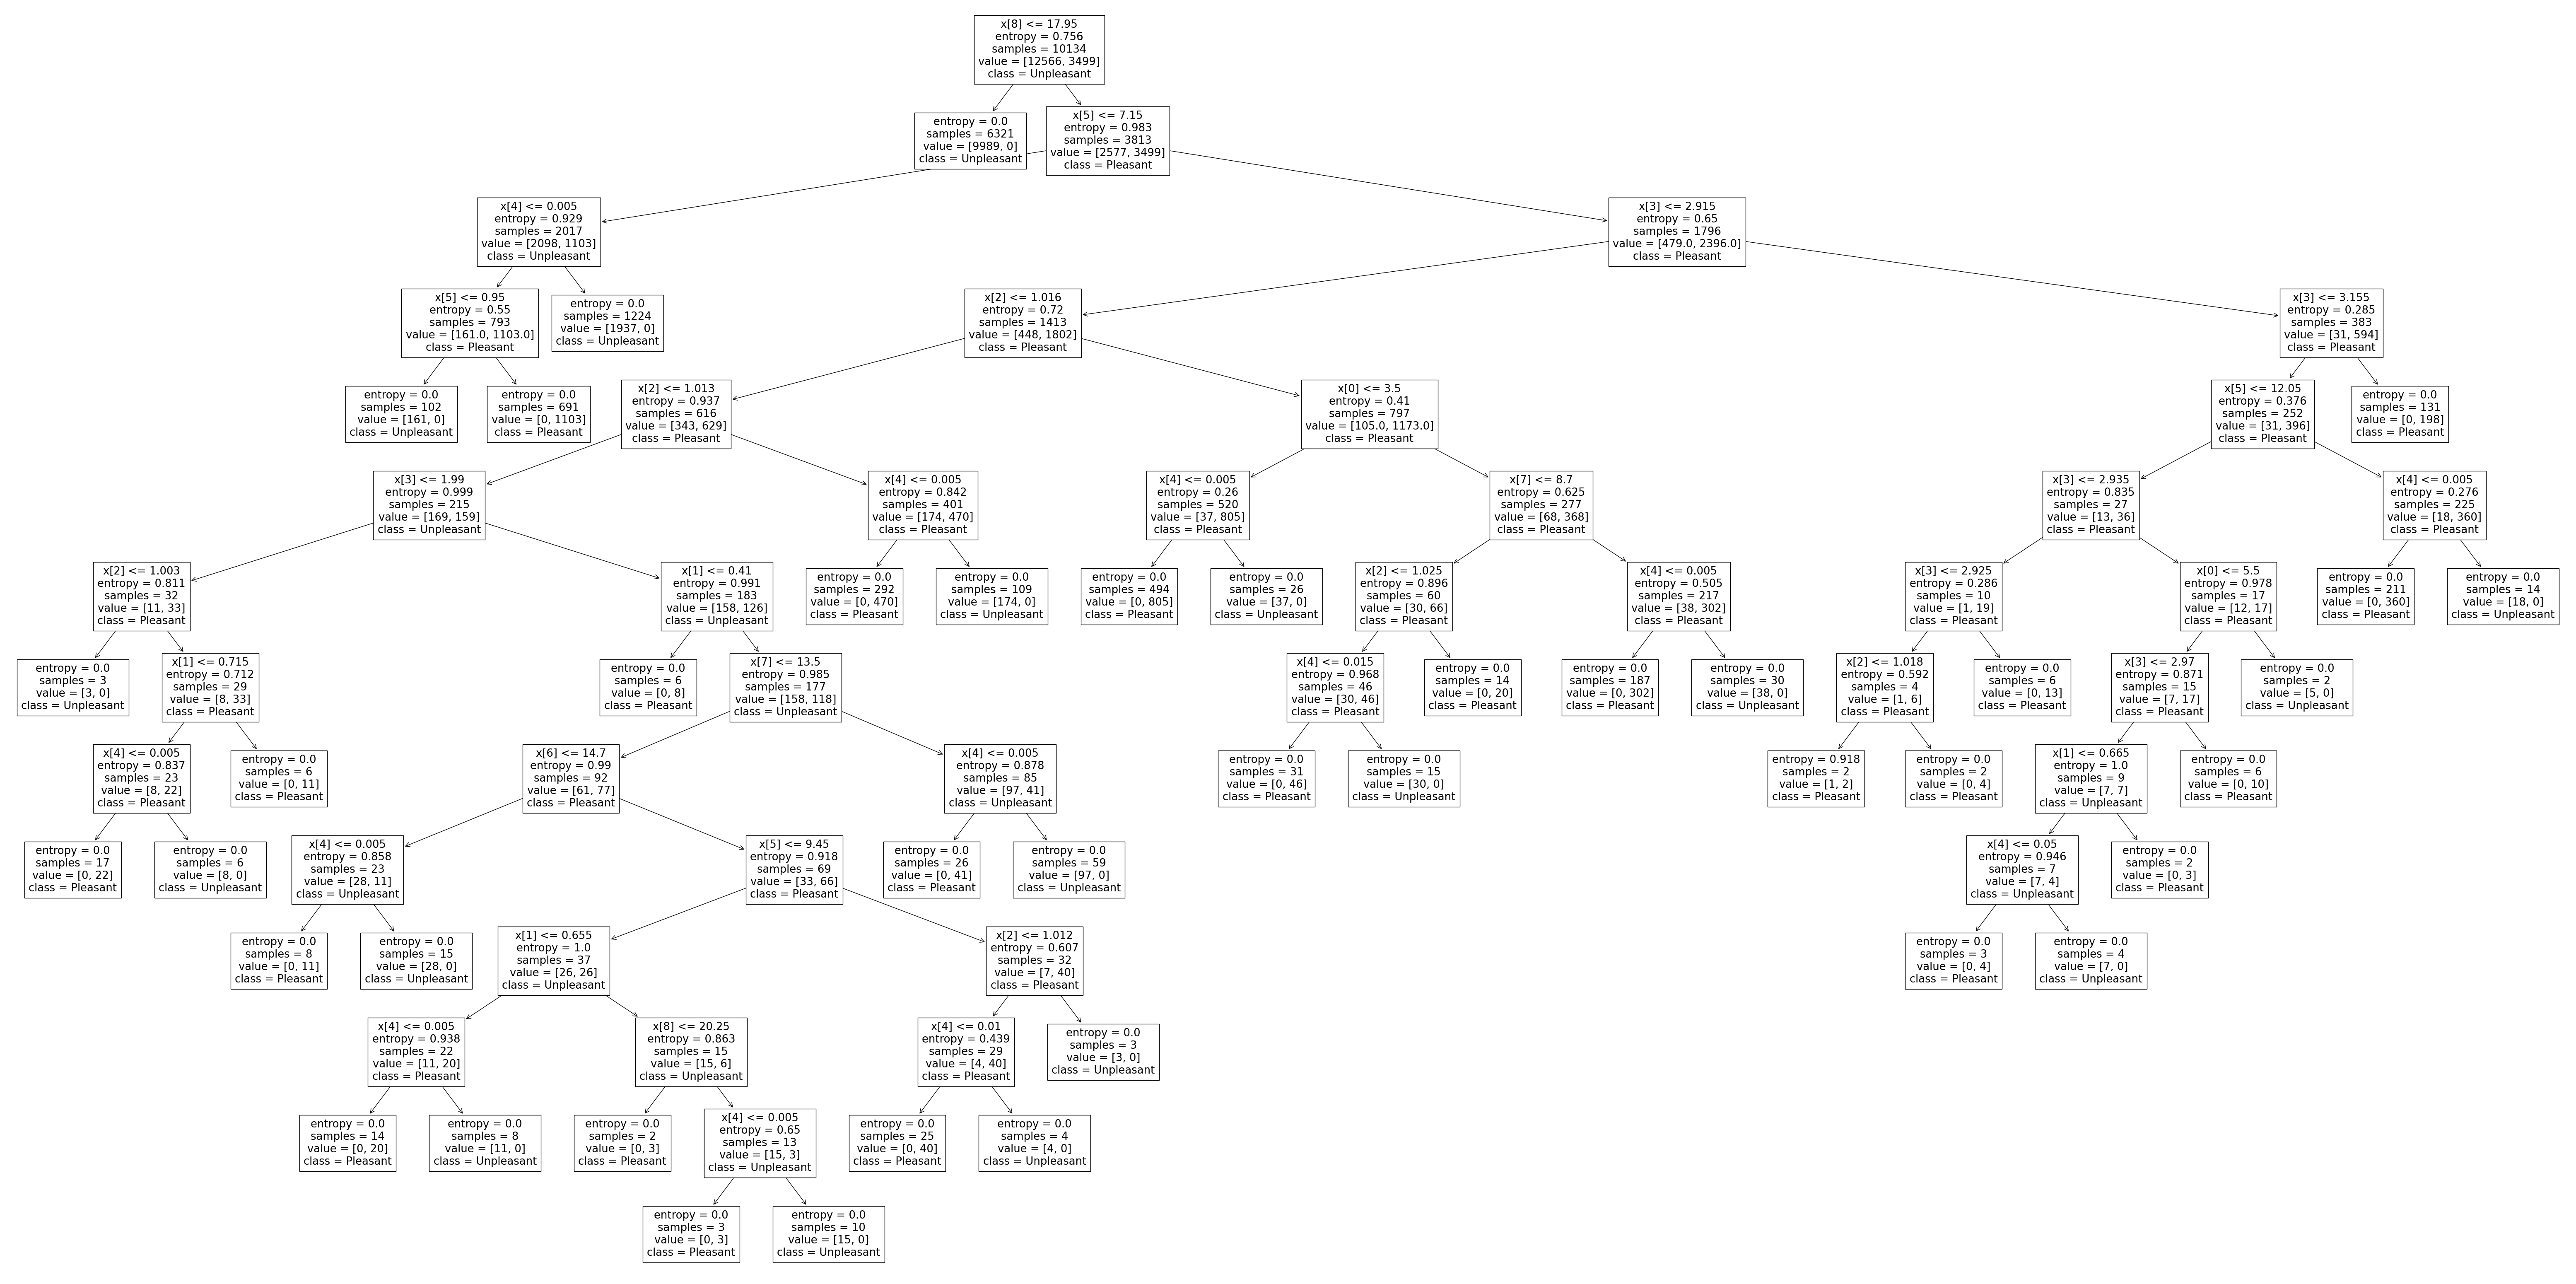

In [26]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf_opt.estimators_[1], class_names=act);
#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [27]:
# Creating new path to save visuals
save_path = r'/Users/urvi/Desktop/Machine Learning with Python/Achivement 2/Climate wins 2/Visuals'

fig.savefig(f"{save_path}/optmised_tree_weatherDus-01.png")

# Find the most important measures

In [28]:
np.set_printoptions(threshold=np.inf)
newarray = clf_opt.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.02464487, 0.00624249, 0.00407591, 0.04796276, 0.35930486,
       0.06716368, 0.10413668, 0.00907002, 0.37739874])

In [29]:
np.set_printoptions(threshold=1000)

In [30]:
print(newarray.shape)

(9,)


In [31]:
# newarray = newarray.reshape(-1,15,9)
# print(newarray.shape)
newarray

array([0.02464487, 0.00624249, 0.00407591, 0.04796276, 0.35930486,
       0.06716368, 0.10413668, 0.00907002, 0.37739874])

In [32]:
important = pd.Series(newarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.024645
humidity            0.006242
pressure            0.004076
global_radiation    0.047963
precipitation       0.359305
sunshine            0.067164
temp_mean           0.104137
temp_min            0.009070
temp_max            0.377399
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


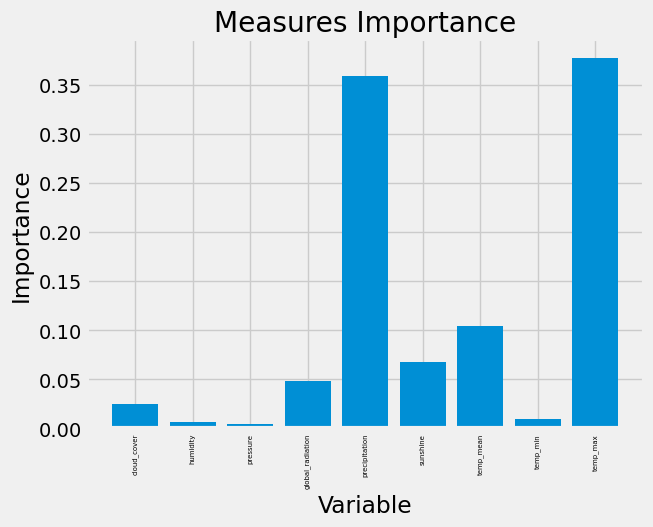

In [33]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation = 'vertical', fontsize = 5)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Measures Importance')
plt.savefig(f"{save_path}/Measure_ImportancesAll.png")

The most important variables didn't change in the optimized model, although the importance of the variables shifted slightly. For all stations, maximum temperature, average temperature, and precipitation are the three most important factors.